In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from ast import literal_eval
from glob import glob 

In [2]:
paths = {
    'Lgbm' :"lgbm/lgbm_vanilla",
    'Catboost' :"catboost/catboost_vanilla",
    "Ours_kfold" :"ours/ours_Kfold",
     "Ours_Vanilla" :"ours/ours_CartVanilla",
    "Sklearn_Mean_Imputing" : "sklearn/sklearn_mean_imputing",
    "Sklearn_One_Hot" : "sklearn/sklearn_one_hot",
    'Xgboost_Mean_Imputing': "xgboost/xgboost_mean_imputing",
    'Xgboost_One_Hot': "xgboost/xgboost_one_hot"
    
    
}

In [3]:
features = ['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']
all_cols = [ 'gain', 'permutation_train', 'permutation_test','shap_train', 'shap_test']
our_cols = [ 'gain', 'permutation_train', 'permutation_test']
temp_paths = glob("lgbm/lgbm_vanilla*")

In [4]:
def plot_boxplot(paths, algorithm, results):
    temp_results = []
    cols = our_cols if algorithm.startswith('Ours') else all_cols
    for path in paths:
        df = pd.read_csv(path, converters = {col: literal_eval for col in cols})
        for fi in all_cols:
            temp_df = pd.Series(df.loc[0,fi]).to_frame() 
            temp_df = temp_df.reset_index()
            temp_df.columns = ['feature', 'value']
            temp_df['fi_type'] = fi
            temp_df['algo'] = algorithm
            temp_results.append(temp_df)

    plt.figure(figsize=(20,8))
    temp_results = pd.concat(temp_results)
    temp_results = temp_results[temp_results['feature'] != 0]
    results.append(temp_results)
    sns.boxplot(data = temp_results, x = 'feature', y = 'value', hue = 'fi_type').set_title(algorithm)
    plt.show()

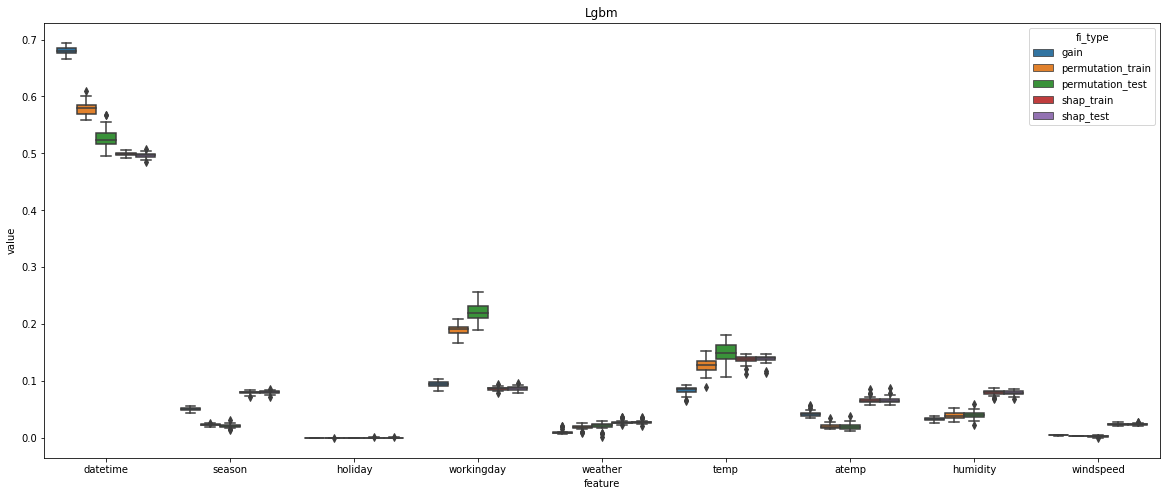

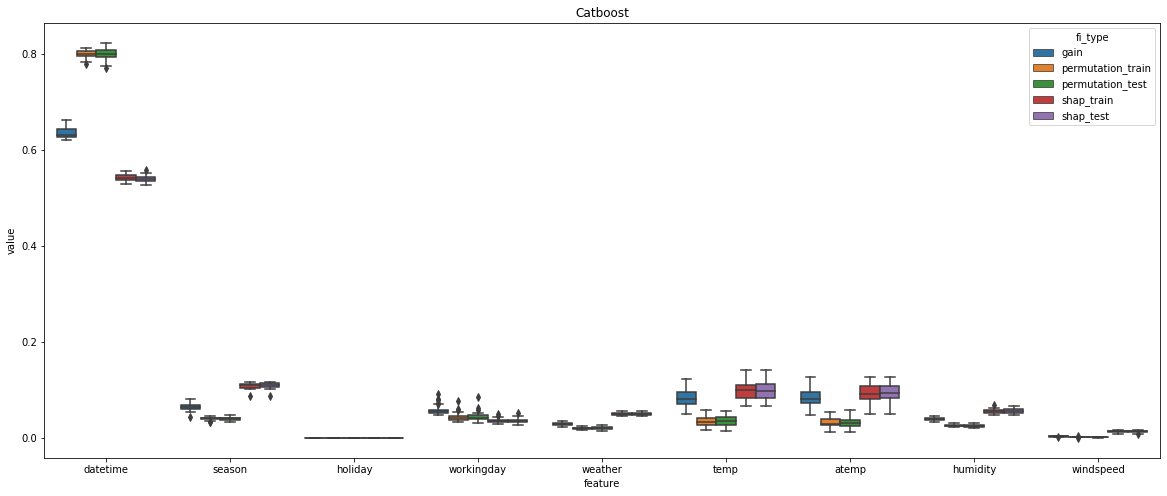

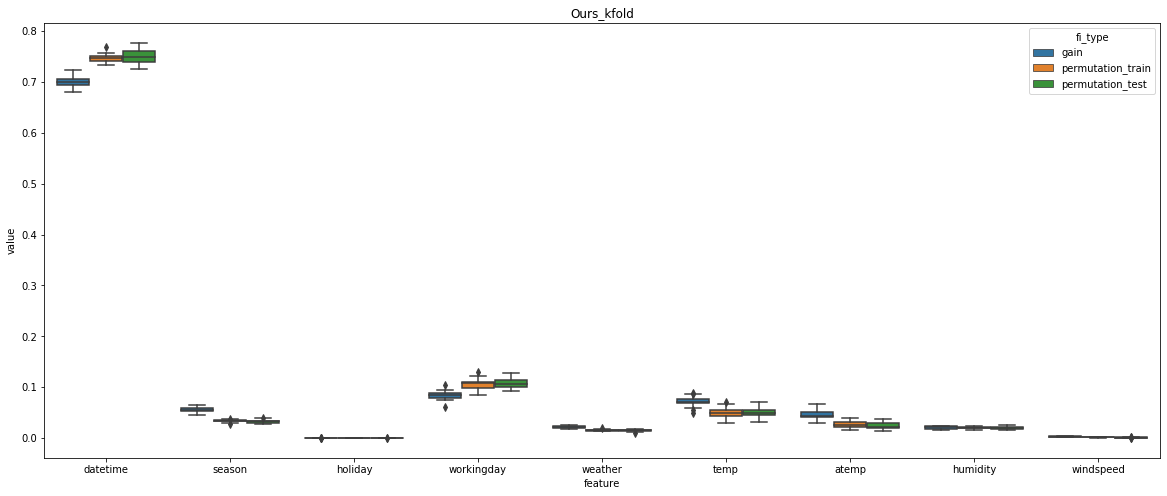

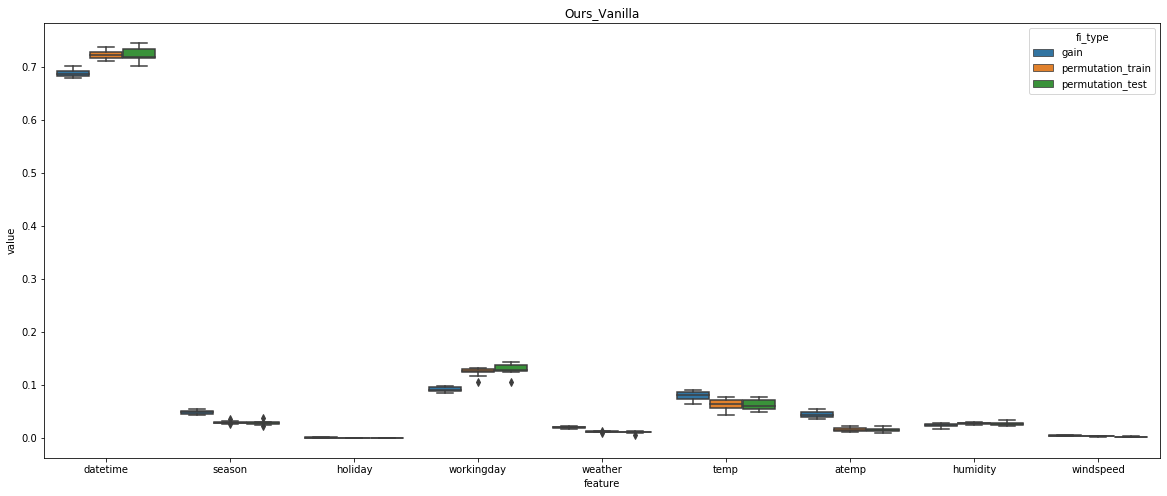

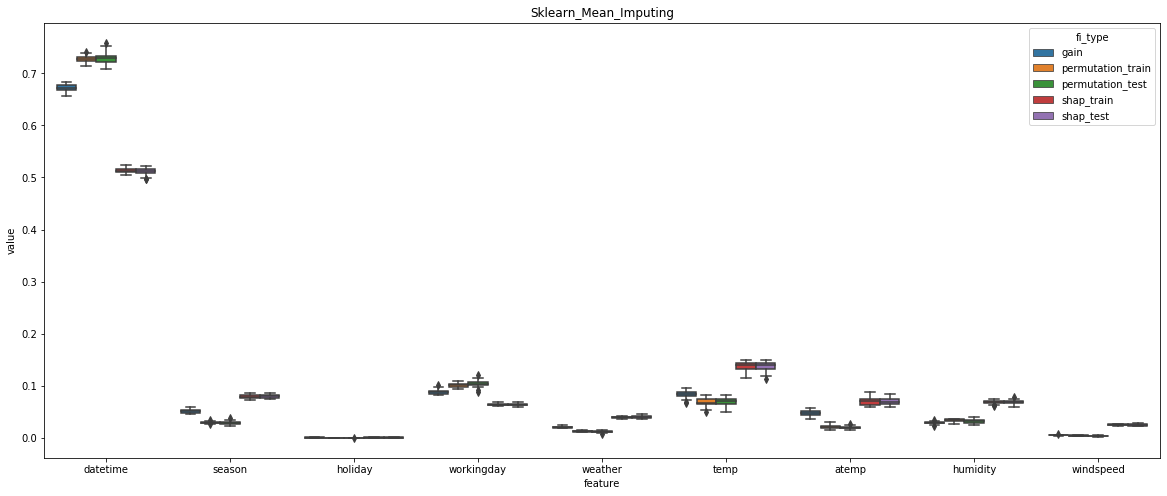

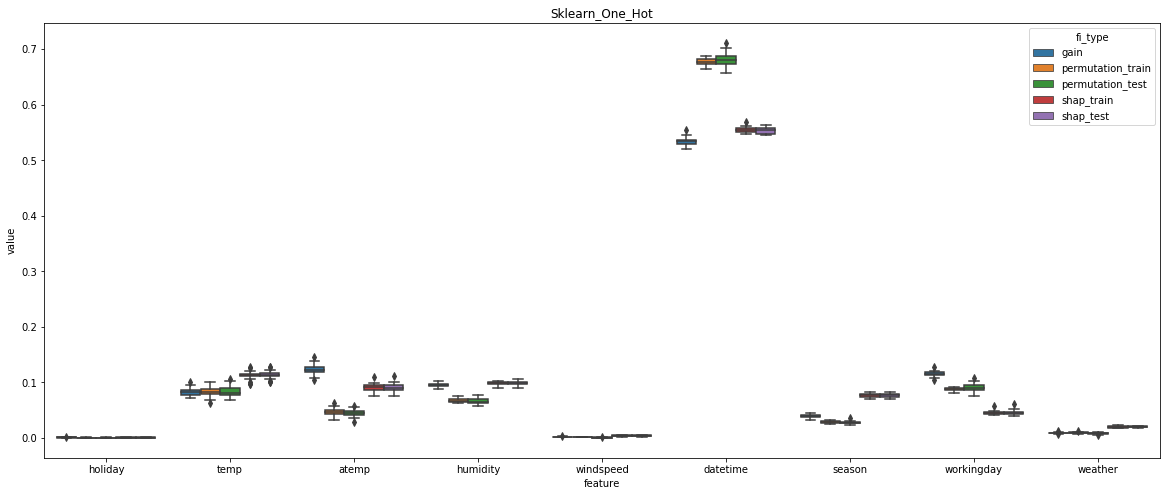

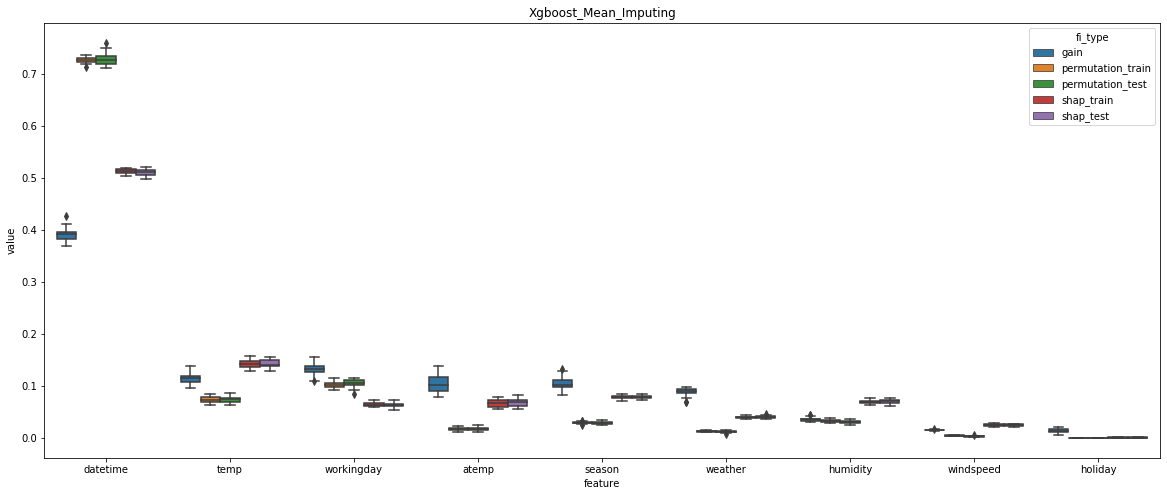

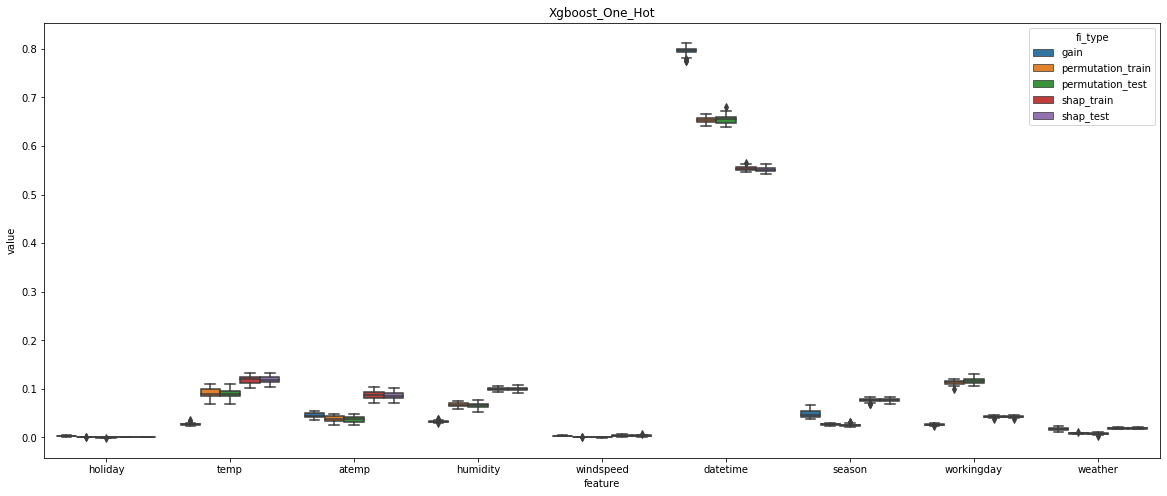

In [5]:
results = []
for algo, path in paths.items():
    plot_boxplot(glob(path +"*"), algo, results)

In [6]:
results = pd.concat(results)

In [36]:
df = results.groupby(['fi_type', 'algo','feature']).value.apply(np.std).to_frame().reset_index()
for fi in df.fi_type.unique():
    print(fi)
    display(df[df.fi_type == fi].pivot(index = 'algo', columns = 'feature',values = 'value' ).style.background_gradient() )
# df['value'].apply(np.std)

gain


feature,atemp,datetime,holiday,humidity,season,temp,weather,windspeed,workingday
algo,,,,,,,,,
Catboost,0.017830,0.010618,0.000152,0.003241,0.007168,0.018745,0.002802,0.000675,0.010420
Lgbm,0.005606,0.007447,0.000127,0.003136,0.003400,0.006919,0.003472,0.000637,0.005445
Ours_Vanilla,0.005558,0.007173,0.000515,0.002904,0.003587,0.008085,0.001497,0.000645,0.004387
Ours_kfold,0.009365,0.010280,0.000046,0.002394,0.004311,0.009817,0.002127,0.000630,0.008671
Sklearn_Mean_Imputing,0.004628,0.006621,0.000332,0.002361,0.003876,0.006518,0.001564,0.000610,0.004698
Sklearn_One_Hot,0.008446,0.006261,0.000330,0.003810,0.003067,0.006617,0.001075,0.000464,0.004579
Xgboost_Mean_Imputing,0.015484,0.012737,0.003809,0.003509,0.011666,0.009612,0.007875,0.001082,0.010423
Xgboost_One_Hot,0.005359,0.009140,0.000985,0.002025,0.007295,0.002970,0.003247,0.000662,0.001235


permutation_test


feature,atemp,datetime,holiday,humidity,season,temp,weather,windspeed,workingday
algo,,,,,,,,,
Catboost,0.009908,0.011144,0.000068,0.002689,0.003866,0.010670,0.002974,0.000531,0.010258
Lgbm,0.005500,0.017086,0.000057,0.006847,0.003460,0.016882,0.006442,0.001158,0.016112
Ours_Vanilla,0.003172,0.011856,0.000000,0.002771,0.002941,0.009596,0.001641,0.000549,0.008176
Ours_kfold,0.006532,0.014481,0.000000,0.002986,0.003123,0.009365,0.001752,0.000589,0.010822
Sklearn_Mean_Imputing,0.002766,0.011785,0.000187,0.003671,0.003366,0.007778,0.001696,0.000768,0.006221
Sklearn_One_Hot,0.006013,0.011850,0.000258,0.004824,0.002552,0.008794,0.001583,0.000376,0.007108
Xgboost_Mean_Imputing,0.003231,0.011909,0.000165,0.002915,0.002715,0.005899,0.001697,0.000784,0.007569
Xgboost_One_Hot,0.006491,0.009280,0.000330,0.005124,0.002459,0.008691,0.001620,0.000321,0.006168


permutation_train


feature,atemp,datetime,holiday,humidity,season,temp,weather,windspeed,workingday
algo,,,,,,,,,
Catboost,0.009190,0.007783,0.000086,0.001859,0.003151,0.010732,0.001744,0.000428,0.008973
Lgbm,0.004364,0.011239,0.000042,0.005595,0.001648,0.012931,0.004645,0.000361,0.008661
Ours_Vanilla,0.003128,0.007238,0.000000,0.001797,0.002290,0.009230,0.000792,0.000340,0.006458
Ours_kfold,0.006224,0.008474,0.000000,0.002344,0.002373,0.009870,0.001226,0.000410,0.010229
Sklearn_Mean_Imputing,0.003052,0.005850,0.000158,0.002656,0.001937,0.007978,0.000841,0.000402,0.004198
Sklearn_One_Hot,0.005918,0.005808,0.000124,0.003502,0.002009,0.007895,0.000951,0.000286,0.002538
Xgboost_Mean_Imputing,0.002755,0.005174,0.000164,0.002904,0.001852,0.005940,0.000920,0.000627,0.005515
Xgboost_One_Hot,0.006588,0.005833,0.000090,0.004165,0.001796,0.009491,0.000951,0.000290,0.003987


shap_test


feature,atemp,datetime,holiday,humidity,season,temp,weather,windspeed,workingday
algo,,,,,,,,,
Catboost,0.017839,0.006950,0.000250,0.004839,0.005940,0.019411,0.002955,0.002255,0.005140
Lgbm,0.006173,0.005297,0.000249,0.004367,0.002876,0.007313,0.003494,0.001750,0.003720
Sklearn_Mean_Imputing,0.005993,0.006347,0.000336,0.004305,0.003144,0.008538,0.002479,0.001740,0.002528
Sklearn_One_Hot,0.006986,0.005329,0.000193,0.003918,0.003455,0.006431,0.001067,0.001075,0.003920
Xgboost_Mean_Imputing,0.006755,0.006314,0.000318,0.004089,0.003085,0.007067,0.002439,0.002126,0.004094
Xgboost_One_Hot,0.008242,0.004841,0.000168,0.003673,0.003300,0.006777,0.001271,0.001315,0.001960


shap_train


feature,atemp,datetime,holiday,humidity,season,temp,weather,windspeed,workingday
algo,,,,,,,,,
Catboost,0.017378,0.007120,0.000244,0.004553,0.005766,0.019409,0.002593,0.002274,0.004678
Lgbm,0.006080,0.003607,0.000239,0.004176,0.002641,0.007705,0.003634,0.001684,0.003163
Sklearn_Mean_Imputing,0.006288,0.004769,0.000315,0.003498,0.003136,0.008122,0.001619,0.001473,0.002352
Sklearn_One_Hot,0.007050,0.004835,0.000178,0.003206,0.003379,0.006725,0.001498,0.001063,0.003073
Xgboost_Mean_Imputing,0.006703,0.004545,0.000346,0.003635,0.003114,0.007223,0.001762,0.002138,0.003249
Xgboost_One_Hot,0.008479,0.004781,0.000149,0.003110,0.003539,0.007264,0.001172,0.001303,0.001399


In [41]:
rmse_dict = {}
for algo, path in paths.items():
    temp_results = []
    for path in glob(path +"*"):
        df = pd.read_csv(path)
        temp_results.append(df.loc[0, 'rmse'])
    rmse_dict[algo]  = temp_results
        

In [47]:
for k, v in rmse_dict.items():
    print(k, np.round(np.mean(v), 3), np.round(np.std(v), 3))

Lgbm 76.855 2.35
Catboost 101.015 4.289
Ours_kfold 83.697 2.615
Ours_Vanilla 77.753 2.261
Sklearn_Mean_Imputing 83.572 2.438
Sklearn_One_Hot 89.655 2.582
Xgboost_Mean_Imputing 83.7 2.181
Xgboost_One_Hot 89.908 2.65
